# NB: Introducing NumPy

Programming for Data Science

<img src="../../media/numpy-logo.png" style="float:right;"/>

## What is NumPy?

NumPy stands for **Numerical Python**. 

It is designed for **high-performance numerical computing** in Python. 

Numerical methods are computational and data-driven techniques used to find **approximate solutions** to continuous mathematical processes that cannot be solved analytically.

For example, differential equations, integrals, derivatives, or optimization problems often require a numerical solution.

Because numerical methods are so important to the sciences, NumPy is the basis of what is called **the scientific "stack"** in Python.

Major packages in this stack include _SciPy_, _Matplotlib_, _SciKitLearn_, and _Pandas_. 

Understanding what NumPy does and how it works is **essential** for almost anything data science related in Python.

## A New Data Structure

Let's begin with looking at NumPy's fundamental **design**.

Essentially, NumPy introduces **a new data structure** to Python &mdash; the **n-dimensional array**. 

Along with with this data structure, it introduces a collection of **operations, functions, and methods** that take advantage of this data structure.

NumPy also provides a new way of applying functions to data made possible by the data structure -- **vectorized functions**. 

Vectorized functions **replace the use of loops** and comprehensions to apply a function to a set of data. 

NumPy also introduces a bunch of new **data types**.

Let's take a look at it.

## Importing the Library

To import NumPy, we typically alias it as `np`.

In [57]:
import numpy as np

NumPy is by widespread convention aliased as `np`.

## The ndarray

The data structure that NumPy introduces is called the `ndarray`.

Note we will sometimes call ndarrays just **arrays**.

The ndarray is a **multi-dimensional** array object.

Unlike Python lists, ndarrays **enforce a data type** among elements.

## About Dimensions

The term "dimension" is ambiguous.

Sometimes it refers to the dimensions of things in the world, such as space and time.

Sometimes it refers to the dimensions of a data structure, independent of what it represents in the world.

Note that you can represent multiple world dimensions in a two-dimensional data structure &mdash; each column can be dimension in this sense.

For example, three-dimensional space can be represented as three columns in a two-dimensional table _or_ as three axes in a data cube. 

The dimensions of data structures are sometimes called **axes**.

## Creating Arrays

There are many ways to create arrays in NumPy.

You can create them by passing plain old Pythin lists:

In [76]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

From a list of lists:

In [78]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [79]:
arr2.shape

(2, 4)

In [80]:
arr2.ndim

2

NumPy also offers convenience functions to initial arrays with a specific value, such as $0$:

In [81]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [82]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

`.empty()` will generate an array of uninitialized values.

In [83]:
np.empty((2, 3, 2))

array([[[0.44681451, 1.63001338],
        [0.21062093, 0.01193108],
        [0.39271709, 0.98894578]],

       [[0.62764938, 0.48666047],
        [0.60804881, 0.21196292],
        [0.83234622, 1.11412825]]])

`.arange()` works like `range()` and will generate a sequence of numbers.

In [65]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

We can also create new arrays with **randomaly generated data**. 

`np.random.randn()` will create a new array by drawing samples from the "standard normal" distribution.

Here, we create an array of two dimensions: $2$ rows by $3$ columns:

In [97]:
np.random.randn(2, 3)

array([[-0.50784086, -0.25623129, -1.47942678],
       [ 1.35502514,  1.26259653,  0.19764551]])

And here we use `.randint` to generate 20 random integers between $1$ and $6$:

In [98]:
np.random.randint(1, 7, 20)

array([5, 4, 4, 1, 1, 5, 4, 2, 2, 1, 6, 6, 3, 5, 3, 3, 5, 4, 5, 2])

## Data Types

Unlike any of the previous data structures we have seen in Python, 
**ndarrays must have a single data type** associated with the scalar data they contain.

NumPy introduces 24 new fundamental types to describe different types of scalars.

These derive from the C programming language with which NumPy is built.

![](../../media/dtype-hierarchy.png)

See the [NumPy docs](https://numpy.org/doc/1.25/reference/arrays.scalars.html).

Here we initialize a couple of arrays as different data types (`dtypes`).

In [105]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr1.dtype

dtype('float64')

In [106]:
arr2 = np.array([1, 2, 3], dtype=np.int32)
arr2.dtype

dtype('int32')

Note that dtypes are defined by a set of **constants attached to the NumPy object**, e.g. `np.float64`.

We can also refer to them as strings in some contexts, such in the constructor below:

In [107]:
np.array([1, 2, 3], dtype='float64')

array([1., 2., 3.])

Note that integer arrays default to `int64`:

In [70]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype

dtype('int64')

Arrays can be cast, too:

In [71]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

Here we cast from floats to ints:

In [108]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

And from strings to floats:

In [73]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

Note that NumPy converts data types to make the array uniform:

In [109]:
non_uniform = np.array([1.25, -9.6, 42])
non_uniform, non_uniform.dtype

(array([ 1.25, -9.6 , 42.  ]), dtype('float64'))

Ranges default to integers:

In [75]:
int_array = np.arange(10)

In [20]:
int_array

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

We can use the dtype on one array to cast another:

In [21]:
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

And here is an empty array of unsigned integers:

In [22]:
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

## Shape

The number and size of the dimensions of an array is called the **shape** of the array.

Shape is represented by a **tuple**, e.g. `(n, m)` for a 2D array.

The **length** of the tuple is the number of **dimensions**.

The **values** of the tuple are the number of **elements** in each dimension.

The `shape` property of the array object tells us that the array has $2$ dimensions &mdash; the number of elements in the tuple &mdash; with $2$ elements in the first dimension and $3$ in the second.

Here we create an array of $3$ dimensions:

In [23]:
data3 = np.random.randn(2, 3, 2)

In [24]:
data3

array([[[ 0.44681451,  1.63001338],
        [ 0.21062093,  0.01193108],
        [ 0.39271709,  0.98894578]],

       [[ 0.62764938,  0.48666047],
        [-0.60804881, -0.21196292],
        [ 0.83234622, -1.11412825]]])

In [25]:
data3.shape

(2, 3, 2)

## 1-D Matrix vs Vector

Note that there is a difference between a $1$-dimensional array, i.e. a vector, and a single column or row $2$-dimensional array, i.e. a matrix.

Consider the following example.

In [26]:
one_row_matrix = np.array([[1,2,3,4]])
one_d_vector = np.array([1,2,3,4])

In [27]:
one_row_matrix, one_row_matrix.shape

(array([[1, 2, 3, 4]]), (1, 4))

In [28]:
one_d_vector, one_d_vector.shape

(array([1, 2, 3, 4]), (4,))

We will encounter this difference when we learn about selecting parts of arrays with indexing.

## Reshaping

If we want to make it into a 1-column matrix, we need to reshape it using `np.reshape()`.

Here we convert an array from $3$ to $2$ dimensions.

In [29]:
data3

array([[[ 0.44681451,  1.63001338],
        [ 0.21062093,  0.01193108],
        [ 0.39271709,  0.98894578]],

       [[ 0.62764938,  0.48666047],
        [-0.60804881, -0.21196292],
        [ 0.83234622, -1.11412825]]])

In [30]:
data3.shape

(2, 3, 2)

In [31]:
data4 = np.reshape(data3, (4,3))
data4

array([[ 0.44681451,  1.63001338,  0.21062093],
       [ 0.01193108,  0.39271709,  0.98894578],
       [ 0.62764938,  0.48666047, -0.60804881],
       [-0.21196292,  0.83234622, -1.11412825]])

Because sometimes a function wants to work with a single column (or row) matrix, and not a vector, do this to accomplish the trick:

In [32]:
np.reshape(one_d_vector, (-1, 1))

array([[1],
       [2],
       [3],
       [4]])

In [33]:
np.reshape(one_d_vector, (1, -1))

array([[1, 2, 3, 4]])

Note the use of $-1$ in the argument. This means use the length of the vector that is passed to it. 

## Transposing Arrays and Swapping Axes

Transposing is a special form of reshaping. 

Arrays have the transpose method and also the special `T` attribute:

In [34]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [35]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [36]:
arr.shape, arr.T.shape

((3, 5), (5, 3))

Transposing is often used when computing the dot product between two arrays.

Here's an example.

In [37]:
arr = np.random.randn(6, 3)
arr

array([[ 0.11479688,  0.33156395,  0.59524203],
       [ 1.15646137, -0.08704862,  0.86381333],
       [-0.51155823, -1.01358134,  1.27705313],
       [ 2.25510406,  0.74727944,  1.91715758],
       [ 0.49557844,  0.07061821, -0.1338661 ],
       [ 1.77220434, -0.88452654,  1.09233716]])

In [38]:
np.dot(arr.T, arr)

array([[10.08407358,  0.608528  ,  6.60690496],
       [ 0.608528  ,  2.49065994, -0.71523233],
       [ 6.60690496, -0.71523233,  7.61796502]])

For higher dimensional arrays, `transpose` will accept a tuple of axis numbers to permute the axes.

Warning &mdash; this can get confusing to conceptualize and visualize!

In [39]:
arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [40]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

Simple transposing with `.T` is just a special case of swapping axes. ndarray has the method `swapaxes` which takes a pair of axis numbers:

In [41]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [42]:
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## Example: The Normal Equation

Sometimes, you need to convert vectors into 1-column matrices to make certain linear algebraic functions work.

Consider two random variables, $x$ and $y$, represented as 1-dimensional arrays (vectors).

In [43]:
x = np.random.randn(100)
y = np.random.randn(100)

In [44]:
x

array([-1.16413841,  1.16865536,  0.4525609 , -0.2722449 , -1.27289815,
       -0.71810371,  1.883716  ,  0.03320101,  0.71014505,  1.04896451,
       -0.50324909,  0.79188057,  0.13946271, -0.42061852,  0.51837663,
       -1.93336155,  0.13682373, -0.49900861,  0.11101955, -0.043336  ,
        1.08324475, -0.40746863, -0.47573543, -1.27514158, -0.49048658,
       -0.31183165, -1.11826591, -1.45995636, -0.32890325, -0.45732548,
       -0.50317275,  0.9888555 , -0.70226293, -0.74463256, -0.8641995 ,
        2.38039087,  0.19828622,  0.80782525, -0.63194502, -1.09783542,
       -0.14037333, -0.2037294 , -0.22198999,  0.76775486,  0.02113618,
       -1.79746008,  0.00301634,  0.35150085, -1.53745733,  0.32611821,
        0.03922539,  0.75065704, -2.52018155, -0.9952756 , -1.79767193,
       -0.77861022,  0.40698474,  0.38372067, -0.47768404, -0.57599198,
        0.73162153, -0.79905799,  0.24235914,  0.99268306, -2.27122081,
       -1.17120308,  0.03414284, -1.22661171,  2.54755592,  0.71

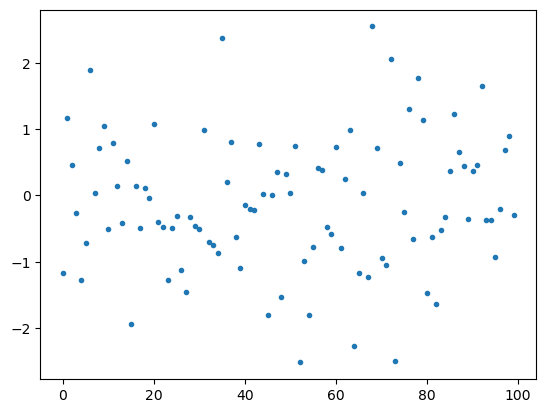

In [45]:
from matplotlib.pyplot import plot
plot(x, linestyle='None', marker='.');

We can fit a regression line using the **normal equation**, which appears in this week's homework.

$\begin{aligned} \hat\beta_i=(x^Tx)^{−1}x^Ty \end{aligned}$ 

Here is a standard way of expressing it in NumPy:

In [46]:
get_beta1 = lambda x, y: (np.linalg.inv(x.T.dot(x))) * (x.T.dot(y))

However, it will fail if we pass it our two variables, `x` and `y`.

The reason is that it expects `x` to be a matrix, since it is designed to handle n-dimension predictor variables, usually represented as $\textbf{X}$. 

In [47]:
x.shape, y.shape

((100,), (100,))

In [48]:
get_beta1(x, y)

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

The revised function will work with a vector as `x`:

$\hat\beta_i = \large\frac{1}{x^Tx} \small(x^Ty)$

In [51]:
get_beta2 = lambda x, y: (1 / x.T.dot(x)) * (x.T.dot(y))

In [52]:
get_beta2(x, y)

0.06399264800571315

We can fix the problem in the general case by converting our vector into a 1-column matrix using `np.reshape()`.

In [53]:
x_as_matrix = np.reshape(x, (-1, 1))

In [54]:
get_beta1(x_as_matrix, y)

array([[0.06399265]])

In [55]:
get_beta1(x_as_matrix, y)[0][0]

0.06399264800571315

In [56]:
get_beta1(x_as_matrix, y)[0][0] == get_beta2(x, y)

True